# Visualizing Data

CBE 20258. Numerical and Statistical Analysis. Spring 2020.

&#169; University of Notre Dame.

## Learning Objectives

After studying this notebook and your notes, completing the activities, asking questions in class, you should be able to:
* Understand how to use scatter plots to display data.
* Understand how to use histograms to display data.
* Understand how to use boxplots to display data.
* Understand the difference between bimodal and multimodal plots.

## Visualizing Data

**Further Reading**: §1.3 in Navidi (2015)

There are many ways to visualize data. This semester, we will focus on scatter plots, histograms, and boxplots. We will use matplotlib.

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Scatter Plots

We already learned how to make a scatter plot in matplotlib.

In [28]:
exam1_full = pd.read_csv("../data/Exam_1_scores.csv")
# create empty dictionary
new_data = {}
new_data['Total'] = exam1_full['Total Score']
new_data['P1'] = exam1_full['1-A'] + exam1_full['1-B']
new_data['P2'] = exam1_full['2-A-1'] + exam1_full['2-A-2'] + exam1_full['2-B']
new_data['P2'] += exam1_full['2-C-1'] + exam1_full['2-C-2'] + exam1_full['2-C-3']
new_data['P3'] = exam1_full['3-A'] + exam1_full['3-B-1'] + exam1_full['3-B-2'] + exam1_full['3-B-3']
new_data['P4'] = exam1_full['4-A-1'] + exam1_full['4-A-2'] + exam1_full['4-B']
new_data['P4'] += exam1_full['4-B'] + exam1_full['4-C-1'] + exam1_full['4-C-2']
new_data['P5'] = exam1_full['5-A'] + exam1_full['5-B']
exam1 = pd.DataFrame(new_data)

# Make a copy of the DataFrame
exam1_norm = exam1.copy()

# Divide by the total number of available points
exam1_norm["P1"] = exam1_norm["P1"] / 8
exam1_norm["P2"] = exam1_norm["P2"] / 14
exam1_norm["P3"] = exam1_norm["P3"] / 10
exam1_norm["P4"] = exam1_norm["P4"] / 17
exam1_norm["P5"] = exam1_norm["P5"] / 14
exam1_norm["Total"] = exam1_norm["Total"] / 60

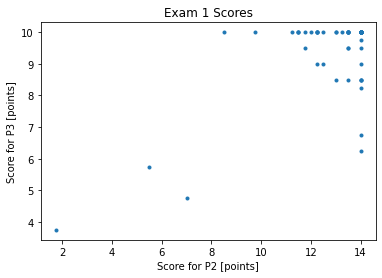

In [29]:

plt.plot(exam1.P2,exam1.P3,marker='.',linestyle=" ")
plt.xlabel("Score for P2 [points]")
plt.ylabel("Score for P3 [points]")
plt.title("Exam 1 Scores")
plt.show()

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Why do these data appear to exist on a grid?
</div>

### Example: Old Faithful

To illustrate key concepts for plotting, we will explore Table 1.6 in Navidi (2015).

In [30]:
old_faithful = pd.read_csv('../data/table1-6.csv')

In [31]:
old_faithful.head()

,Dormancy,Eruption
0,76,Long
1,80,Long
2,84,Long
3,50,Short
4,93,Long


This data set has two columns:
1. The duration of dormant periods (in minutes).
2. Whether the previous erruption was *short* or *long*.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
    <b>Home Activity</b>: Take a look at the nicely formatted table in the textbook (pg. 32).
</div>

### Histogram

Let's visualize the distribution of dormant periods using a histogram.

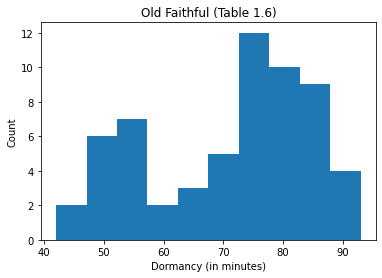

In [32]:
plt.hist(old_faithful.Dormancy)
plt.xlabel("Dormancy (in minutes)")
plt.ylabel("Count")
plt.title("Old Faithful (Table 1.6)")
plt.show()

The horizontal axis of the histogram shows the continous variable of interest. The vertical axis shows the number of observations in each bin. By default, `matplotlib.pylot` uses equal size bins and automatically determines the number of bins. We can, of course, override these options.

https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.hist.html

https://matplotlib.org/3.1.0/gallery/statistics/hist.html

For example, let's use 11 bins that go from 40 to 95 minutes to match the textbook. Let's also make the bins 50% transparent (`alpha=0.5`). Finally, we will set `density=True` to normalize by the number of observations and set the color to purple.

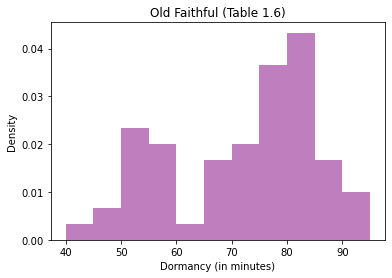

In [33]:
plt.hist(old_faithful.Dormancy, bins=11, range=(40, 95),alpha=0.5,density=True,color='purple')
plt.xlabel("Dormancy (in minutes)")
plt.ylabel("Density")
plt.title("Old Faithful (Table 1.6)")
plt.show()

This plot is **bimodal**. There is one mode between 50 and 55 minutes and a second mode between 80 and 85 minutes. Often, bimodal data are due to not accounting for an important scientific phenomena.

Let's split our data based on duration of the previous eruption. We will make two histograms.

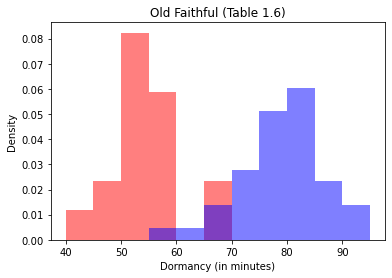

In [34]:
# find the elements where Eruption is 'Short'
i = old_faithful.Eruption == 'Short'

# Create the histogram for short
plt.hist(old_faithful.Dormancy[i], bins=11, range=(40, 95),alpha=0.5,density=True,color='red',label='Short')

# find the elements where Eruption is 'Long'
j = old_faithful.Eruption == 'Long'

# Create histogram for long
plt.hist(old_faithful.Dormancy[j], bins=11, range=(40, 95),alpha=0.5,density=True,color='blue',label='Short')

# Add labels
plt.xlabel("Dormancy (in minutes)")
plt.ylabel("Density")
plt.title("Old Faithful (Table 1.6)")
plt.show()

Ah ha, we can explain the two modes by accounting for the duration of the previous eruption.

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Make a histogram of the low altitude emissions data set.
</div>

In [35]:
# hint: you can access the data with 
# low.PM

### Boxplot

A **boxplots** visualizes the median, first and third quartiles, and any outliers. Here is the basic anatomy of a boxplot:

![boxplot](https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png)

The **interquartile range** is the difference between the third and first quartiles. Recall, between the first and third quartiles are the middle 50% of the data. Any observations 1.5 times the IQR beyond the first and third quartiles are considers **extreme outliers** and marked with a $*$ or circle on the boxplot.

Let's make a boxplot of the Old Faithful data.

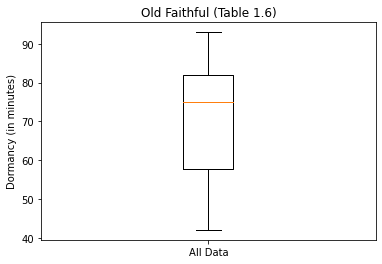

In [36]:
# Notice that both the data and labels are in lists,
# and the lists have the same length
plt.boxplot([old_faithful.Dormancy], labels=['All Data'])
plt.ylabel("Dormancy (in minutes)")
plt.title("Old Faithful (Table 1.6)")
plt.show()

The organge line is the median. There are no outliers shown on this boxplot.

Now let's make a comparative boxplot.

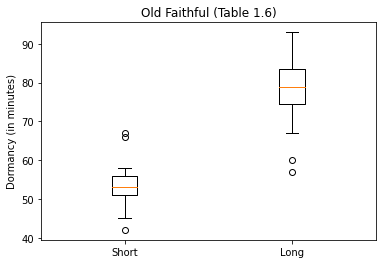

In [37]:
# find the elements where Eruption is 'Short'
i = old_faithful.Eruption == 'Short'

# find the elements where Eruption is 'Long'
j = old_faithful.Eruption == 'Long'

# Create two side-by-side boxplots
plt.boxplot([old_faithful.Dormancy[i], old_faithful.Dormancy[j]], labels=['Short','Long'])
plt.ylabel("Dormancy (in minutes)")
plt.title("Old Faithful (Table 1.6)")
plt.show()

Now we see some outliers.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Optional Home Activity</b>: After class, test your skills by making a comparative boxplot for the low and high altitude emssions data set. Compare your work to Figure 1.15 in Navidi.
</div>

### Visualization Practice: Exam Scores

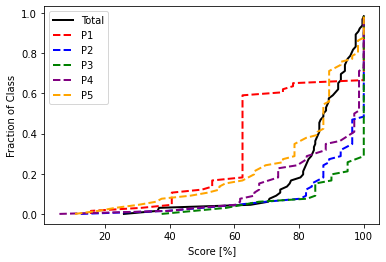

In [38]:
# Cumulative distribution function
n = np.arange(0,len(exam1_norm))/len(exam1_norm)
plt.plot(exam1_norm['Total'].sort_values()*100,n,color="black",label="Total",linewidth=2)
plt.plot(exam1_norm['P1'].sort_values()*100,n,color="red",label="P1",linewidth=2,linestyle="--")
plt.plot(exam1_norm['P2'].sort_values()*100,n,color="blue",label="P2",linewidth=2,linestyle="--")
plt.plot(exam1_norm['P3'].sort_values()*100,n,color="green",label="P3",linewidth=2,linestyle="--")
plt.plot(exam1_norm['P4'].sort_values()*100,n,color="purple",label="P4",linewidth=2,linestyle="--")
plt.plot(exam1_norm['P5'].sort_values()*100,n,color="orange",label="P5",linewidth=2,linestyle="--")
plt.xlabel("Score [%]")
plt.ylabel("Fraction of Class")
plt.legend()
plt.show()

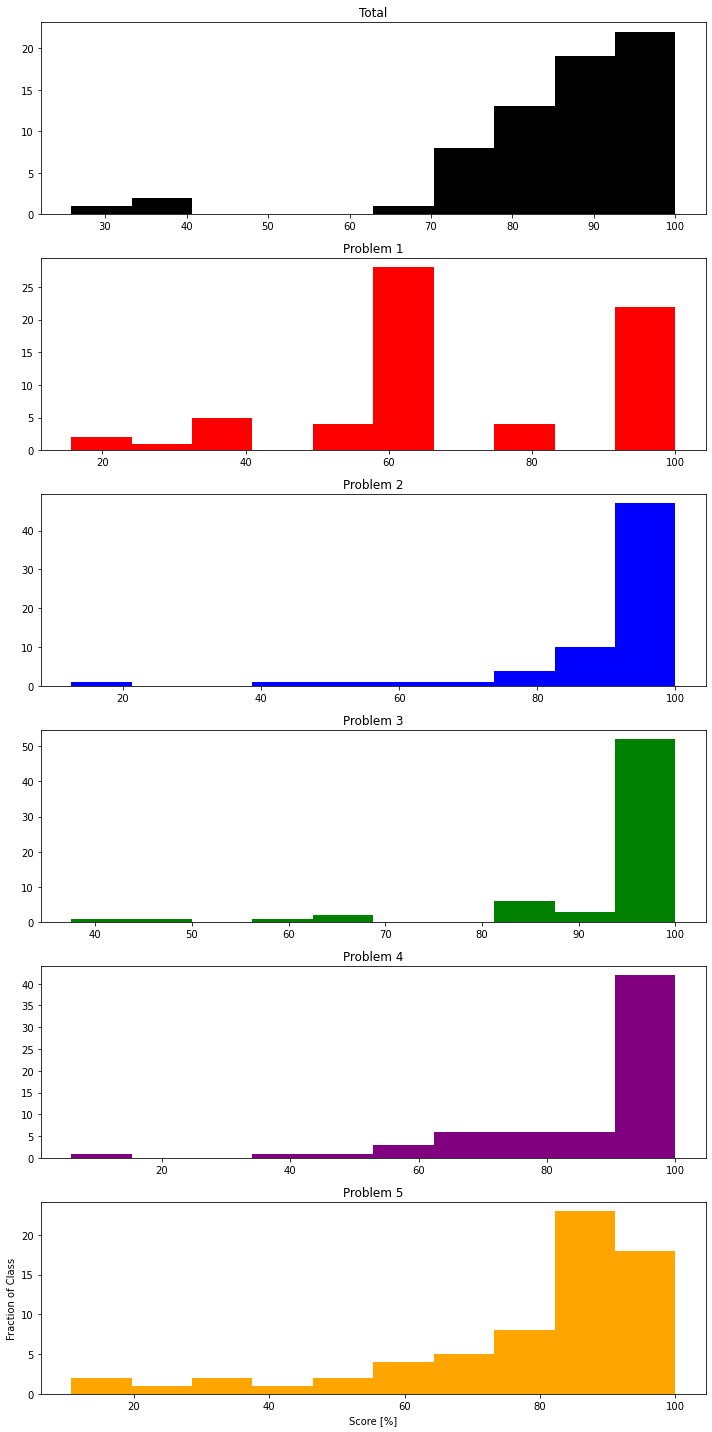

In [39]:
# Histogram

fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(10,20))
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()


ax0.hist(exam1_norm['Total'].sort_values()*100,color="black",label="Total")
ax0.set_title('Total')

ax1.hist(exam1_norm['P1'].sort_values()*100,color="red",label="P1")
ax1.set_title('Problem 1')

ax2.hist(exam1_norm['P2'].sort_values()*100,color="blue",label="P2")
ax2.set_title("Problem 2")

ax3.hist(exam1_norm['P3'].sort_values()*100,color="green",label="P3")
ax3.set_title('Problem 3')

ax4.hist(exam1_norm['P4'].sort_values()*100,color="purple",label="P4")
ax4.set_title('Problem 4')

ax5.hist(exam1_norm['P5'].sort_values()*100,color="orange",label="P5")
ax5.set_title('Problem 5')

plt.xlabel("Score [%]")
plt.ylabel("Fraction of Class")
plt.tight_layout()

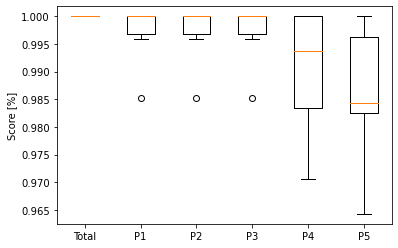

In [40]:
### Boxplot
plt.boxplot(exam1_norm.transpose(), labels=exam1_norm)
plt.ylabel("Score [%]")
plt.show()